In [65]:
from google.cloud import bigquery
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output  

In [66]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"C:\Users\baumgaertel\OneDrive - FAZ\Desktop\Data Science\Projects\Video Game Sales\video-game-sales-374016-5b760956097d.json"
client = bigquery.Client()

# EDA and Analysis

In [67]:
query = """
    SELECT *
    FROM video-game-sales-374016.nutrition.nutrition_table 
"""
df = client.query(query).to_dataframe()

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            530 non-null    object 
 1   Category           530 non-null    object 
 2   Product            530 non-null    object 
 3   Per_Serve_Size     530 non-null    object 
 4   Energy__kCal_      530 non-null    float64
 5   Carbohydrates__g_  530 non-null    float64
 6   Protein__g_        530 non-null    float64
 7   Fiber__g_          530 non-null    float64
 8   Sugar__g_          530 non-null    float64
 9   Total_Fat__g_      530 non-null    float64
 10  Saturated_Fat__g_  530 non-null    float64
 11  Trans_Fat__g_      530 non-null    float64
 12  Cholesterol__mg_   530 non-null    float64
 13  Sodium__mg_        443 non-null    float64
dtypes: float64(10), object(4)
memory usage: 58.1+ KB


In [69]:
df.drop_duplicates(subset='Product', keep='first', inplace=True)

In [70]:
### Column "Category" adds no value to the Dataset.

df.pop("Category")

0      All Meals
1      All Meals
2      All Meals
3      All Meals
4      All Meals
         ...    
525    All Meals
526    All Meals
527    All Meals
528    All Meals
529    All Meals
Name: Category, Length: 464, dtype: object

In [71]:
COMPANIES = list(df["Company"].unique())

kfc = []
dominos = []
mcd = []
pizzahut = []
starbucks = []
burgerking = []

c = 0

bp_data = [kfc, dominos, mcd, pizzahut, starbucks, burgerking]
for name in COMPANIES:
    for item in df.loc[df["Company"] == name]["Energy__kCal_"]:
        bp_data[c].append(item)
    c += 1

Text(0.5, 0, 'Company')

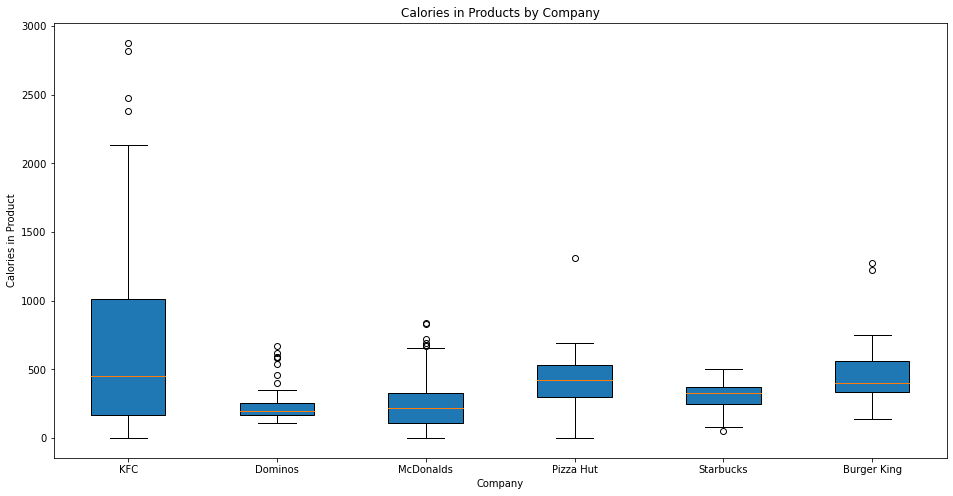

In [72]:
ax = plt.figure(figsize=(16,8))
plt.boxplot(bp_data, labels=COMPANIES, patch_artist=True)
plt.title("Calories in Products by Company")
plt.ylabel("Calories in Product")
plt.xlabel("Company")

The minimum values for some of the Companies seems to be 0. I'm assuming the products in question is water or Diet Drinks.

In [73]:
display(df.loc[df["Energy__kCal_"] == 0]) # My assumption was correct.

,Company,Product,Per_Serve_Size,Energy__kCal_,Carbohydrates__g_,Protein__g_,Fiber__g_,Sugar__g_,Total_Fat__g_,Saturated_Fat__g_,Trans_Fat__g_,Cholesterol__mg_,Sodium__mg_
17,KFC,Pepsi Black,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194,McDonalds,Vedica Natural Mineral Water,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.9
408,Pizza Hut,Lipton Ice Tea Lemon Flavoured,250 ml,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0


I want to separate Drinks from Meals / Food. I won't be able to do that entirely since some of the Products are Menus or Combos, but I'm going to try and parse the products by fat (or fiber) content since drinks usually don't have any fat in them.

In [74]:
display(df.loc[df["Total_Fat__g_"] < 0.5])

drinks = df.drop(df[df.Total_Fat__g_ < 0.5].index, inplace=True)
meals = df.copy()

,Company,Product,Per_Serve_Size,Energy__kCal_,Carbohydrates__g_,Protein__g_,Fiber__g_,Sugar__g_,Total_Fat__g_,Saturated_Fat__g_,Trans_Fat__g_,Cholesterol__mg_,Sodium__mg_
6,KFC,7up Krush\nLime,210.0,81.9,4.10,20.40,0.00,34.10,0.00,0.00,0.0,0.0,0.10
7,KFC,Sparkling\nVanilla Blue),310.0,120.9,6.00,30.10,0.00,34.00,0.00,0.00,0.0,0.0,0.00
8,KFC,(Virgin\nMojito/,310.0,120.4,6.00,30.10,0.00,22.32,0.00,0.00,0.0,0.0,0.00
9,KFC,Pepsi\nRegular,330.0,141.9,36.00,0.00,0.00,35.97,0.00,0.00,0.0,0.0,0.00
10,KFC,Mirinda\nRegular,330.0,181.5,45.50,0.00,0.00,45.54,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,Pizza Hut,Masal Pepsi,250 ml,126.5,30.93,0.21,0.14,30.33,0.38,0.04,0.0,0.0,412.59
440,Pizza Hut,Masala Mirinda,250 ml,156.5,38.18,0.21,0.14,37.58,0.38,0.04,0.0,0.0,420.00
444,Starbucks,Maple Brown Sugar,13.0,50.0,13.00,0.00,0.00,12.00,0.00,0.00,0.0,0.0,3.00
450,Starbucks,Dried Fruit,30.0,100.0,24.00,1.00,2.00,22.00,0.40,0.00,0.0,0.0,0.00


In [75]:
kfc = []
dominos = []
mcd = []
pizzahut = []
starbucks = []
burgerking = []

c = 0

bp_data = [kfc, dominos, mcd, pizzahut, starbucks, burgerking]
for name in COMPANIES:
    for item in meals.loc[df["Company"] == name]["Energy__kCal_"]:
        bp_data[c].append(item)
    c += 1

Text(0.5, 0, 'Company')

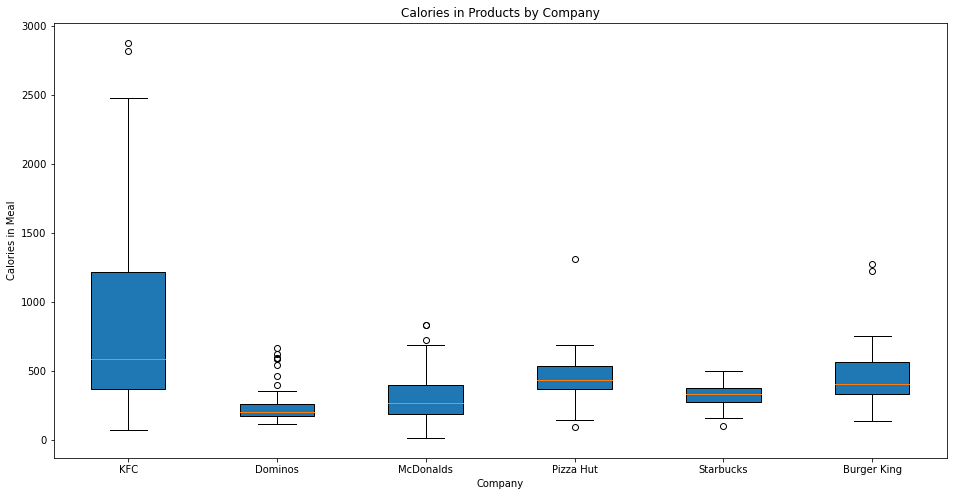

In [76]:
ax = plt.figure(figsize=(16,8))
plt.boxplot(bp_data, labels=COMPANIES, patch_artist=True)
plt.title("Calories in Products by Company")
plt.ylabel("Calories in Meal")
plt.xlabel("Company")

Notice how Starbucks' chart hasn't really changed although almost all of the most popular items are drinks. This is, of course, because of the fat content in milk and lactose products that they use in Coffee and Tea-based drinks.

### Mean and Median Energy Content per Meal

In [77]:
mean_cal = []
median_cal = []

# get mean calories
for count, value in enumerate(COMPANIES):
    mean_cal.append([COMPANIES[count], (meals["Energy__kCal_"].loc[meals["Company"] == COMPANIES[count]].sum())/ len(meals.loc[meals["Company"] == COMPANIES[count]])])

# get median calories
for item in COMPANIES:
    median_cal.append([item, meals["Energy__kCal_"].loc[meals["Company"] == item].median()])

Fast Food Restaurants don't really differ in terms of drinks. Usually the same things are served, which is why I won't analyze the drinks.

## Creating Score System

The Idea is to create a score for every meal that ranks healthiness based on percentage of macronutrients.

High Protein content should increase the score while high sugar and saturated fats should lower the score

Metrics:

kCal per gram -- 
Carbohydrates per gram =
Sugar per Gram --
Protein per gram ++
Fiber per gram =
Fat per gram =
Saturated Fat --
Trans Fat --
Cholesterol -
Sodium per g =

Legend:
-- amount negatively influences score
++ amount positively influences score
= no quantifiable effect on healthiness

In [78]:
### Modifying Per_serve_size column

print(meals["Per_Serve_Size"].unique())

# Some values end with g or ml or something. Those have to be cleaned and converted to int values.

for num in range(len(meals)):
    if meals["Per_Serve_Size"].iloc[num].endswith("g"):
        new_string = meals["Per_Serve_Size"].iloc[num][:-1]
        meals["Per_Serve_Size"].iloc[num] = int(float(new_string))
    elif meals["Per_Serve_Size"].iloc[num].endswith(" g"):
        new_string = meals["Per_Serve_Size"].iloc[num][:-2]
        meals["Per_Serve_Size"].iloc[num] = int(float(new_string))
    elif meals["Per_Serve_Size"].iloc[num].endswith("*"):
        new_string = meals["Per_Serve_Size"].iloc[num][:-1]
        meals["Per_Serve_Size"].iloc[num] = int(float(new_string))
    else: meals["Per_Serve_Size"].iloc[num] = int(float(meals["Per_Serve_Size"].iloc[num]))

clear_output()

### Create Macronutrient by Per_Serve_Size Columns

In [79]:
meals["kCal_per_g"] = meals["Energy__kCal_"] / meals["Per_Serve_Size"]
meals["Carb_per_g"] = meals["Carbohydrates__g_"] / meals["Per_Serve_Size"]
meals["Protein_per_g"] = meals["Protein__g_"] / meals["Per_Serve_Size"]
meals["Fiber_per_g"] = meals["Fiber__g_"] / meals["Per_Serve_Size"]
meals["Sugar_per_g"] = meals["Sugar__g_"] / meals["Per_Serve_Size"]
meals["Fat_per_g"] = meals["Total_Fat__g_"] / meals["Per_Serve_Size"]
meals["SatFat_per_g"] = meals["Saturated_Fat__g_"] / meals["Per_Serve_Size"]
meals["TransFat_per_g"] = meals["Trans_Fat__g_"] / meals["Per_Serve_Size"]
meals["Cholesterol_per_g"] = meals["Cholesterol__mg_"] / meals["Per_Serve_Size"]
meals["Sodium_per_g"] = meals["Sodium__mg_"] / meals["Per_Serve_Size"]

In [80]:
too_high = meals["kCal_per_g"].sort_values(ascending=False, ignore_index=True)

# It's impossible for any food to have more than 9kCal per gram. Those values will be removed.

for value in too_high.values:
    if value > 9:
        meals.drop(meals[meals["kCal_per_g"] == value].index, inplace=True)

In [81]:
### Instantiate Score for every row
meals["Score"] = 0

# Max value for kcal_per_g

max_kcal = max(meals["kCal_per_g"])
min_kcal = min(meals["kCal_per_g"])

for num in range(len(meals)):
    if meals["kCal_per_g"].iloc[num] >= 8:
        meals["Score"].iloc[num] = 1.0
    elif meals["kCal_per_g"].iloc[num] >= 7 and meals["kCal_per_g"].iloc[num] < 8:
        meals["Score"].iloc[num] = 2.125
    elif meals["kCal_per_g"].iloc[num] >= 6 and meals["kCal_per_g"].iloc[num] < 7:
        meals["Score"].iloc[num] = 3.25
    elif meals["kCal_per_g"].iloc[num] >= 5 and meals["kCal_per_g"].iloc[num] < 6:
        meals["Score"].iloc[num] = 4.375
    elif meals["kCal_per_g"].iloc[num] >= 4 and meals["kCal_per_g"].iloc[num] < 5:
        meals["Score"].iloc[num] = 5.5
    elif meals["kCal_per_g"].iloc[num] >= 3 and meals["kCal_per_g"].iloc[num] < 4:
        meals["Score"].iloc[num] = 6.625
    elif meals["kCal_per_g"].iloc[num] >= 2 and meals["kCal_per_g"].iloc[num] < 3:
        meals["Score"].iloc[num] = 7.75
    elif meals["kCal_per_g"].iloc[num] >= 1 and meals["kCal_per_g"].iloc[num] < 2:
        meals["Score"].iloc[num] = 8.875
    elif meals["kCal_per_g"].iloc[num] >= 0 and meals["kCal_per_g"].iloc[num] < 1:
        meals["Score"].iloc[num] = 10

# Score ranges from 1-10. The steps for every kcal per g are 1.125 to account for the scale.

C:\Users\baumgaertel\AppData\Local\Temp\ipykernel_24844\1376943282.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meals["Score"].iloc[num] = 7.75


### Protein influence

In [82]:
### Protein content multiplies score

divs = max(meals["Protein_per_g"]) / 9
multipliers = []

for num in range(1,10):
    multipliers.append(divs*num)
print(multipliers)
# Lowest divisor of Protein_per_g multiplies score by 0.6, going up in steps of 0.1

for num in range(len(meals)):
    if meals["Protein_per_g"].iloc[num] < multipliers[8] and meals["Protein_per_g"].iloc[num] > multipliers[7]:
        meals["Score"].iloc[num] *= 1.4
    elif meals["Score"].iloc[num] < multipliers[7] and meals["Protein_per_g"].iloc[num] > multipliers[6]:
        meals["Score"].iloc[num] *= 1.3
    elif meals["Score"].iloc[num] < multipliers[6] and meals["Protein_per_g"].iloc[num] > multipliers[5]:
        meals["Score"].iloc[num] *= 1.2
    elif meals["Protein_per_g"].iloc[num] < multipliers[5] and meals["Protein_per_g"].iloc[num] > multipliers[4]:
        meals["Score"].iloc[num] *= 1.1
    elif meals["Protein_per_g"].iloc[num] < multipliers[4] and meals["Protein_per_g"].iloc[num] > multipliers[3]:
        None
    elif meals["Protein_per_g"].iloc[num] < multipliers[3] and meals["Protein_per_g"].iloc[num] > multipliers[2]:
        meals["Score"].iloc[num] *= 0.9
    elif meals["Protein_per_g"].iloc[num] < multipliers[2] and meals["Protein_per_g"].iloc[num] > multipliers[1]:
        meals["Score"].iloc[num] *= 0.8
    elif meals["Protein_per_g"].iloc[num] < multipliers[1] and meals["Protein_per_g"].iloc[num] > multipliers[0]:
        meals["Score"].iloc[num] *= 0.7
    elif meals["Protein_per_g"].iloc[num] < multipliers[0] and meals["Protein_per_g"].iloc[num] > 0:
        meals["Score"].iloc[num] *= 0.6
clear_output()

### Sugar Influence

In [84]:
### Sugar content reduces score

divs = max(meals["Sugar_per_g"]) / 9
multipliers = []

for num in range(1,10):
    multipliers.append(divs*num)
print(multipliers)
# Highest divisor of Sugar_per_g multiplies score by 0.5, going up in steps of 0.1

for num in range(len(meals)):
    if meals["Sugar_per_g"].iloc[num] > 0 and meals["Sugar_per_g"].iloc[num] < multipliers[0]:
        meals["Score"].iloc[num] *= 1.3
    elif meals["Sugar_per_g"].iloc[num] > multipliers[0] and meals["Sugar_per_g"].iloc[num] < multipliers[1]:
        meals["Score"].iloc[num] *= 1.2
    elif meals["Sugar_per_g"].iloc[num] > multipliers[1] and meals["Sugar_per_g"].iloc[num] < multipliers[2]:
        meals["Score"].iloc[num] *= 1.1
    elif meals["Sugar_per_g"].iloc[num] > multipliers[2] and meals["Sugar_per_g"].iloc[num] < multipliers[3]:
        meals["Score"].iloc[num] *= 1
    elif meals["Sugar_per_g"].iloc[num] > multipliers[3] and meals["Sugar_per_g"].iloc[num] < multipliers[4]:
        meals["Score"].iloc[num] *= 0.9
    elif meals["Sugar_per_g"].iloc[num] > multipliers[4] and meals["Sugar_per_g"].iloc[num] < multipliers[5]:
        meals["Score"].iloc[num] *= 0.8
    elif meals["Sugar_per_g"].iloc[num] > multipliers[5] and meals["Sugar_per_g"].iloc[num] < multipliers[6]:
        meals["Score"].iloc[num] *= 0.7
    elif meals["Sugar_per_g"].iloc[num] > multipliers[6] and meals["Sugar_per_g"].iloc[num] < multipliers[7]:
        meals["Score"].iloc[num] *= 0.6
    elif meals["Sugar_per_g"].iloc[num] > multipliers[7] and meals["Sugar_per_g"].iloc[num] < multipliers[8]:
        meals["Score"].iloc[num] *= 0.5
clear_output()

### Scaling Values to have highest Value of 10

In [85]:
def scale_values():
    """Scale Values to max 10"""
    unique_scores = list(meals["Score"].unique())
    def func(x):
        gradient = (1 - 10/max(unique_scores))/max(unique_scores) * -1
        return round((gradient * x + (1-gradient)) * x, 1)
    new_scores = []
    for num in meals["Score"]:
        new_scores.append(func(num))
    return new_scores

print(max(scale_values()))

10.2


In [86]:
meals["Score"] = scale_values()

In [87]:
display(meals.loc[meals["Product"] == "1 pc"])

,Company,Product,Per_Serve_Size,Energy__kCal_,Carbohydrates__g_,Protein__g_,Fiber__g_,Sugar__g_,Total_Fat__g_,Saturated_Fat__g_,...,Carb_per_g,Protein_per_g,Fiber_per_g,Sugar_per_g,Fat_per_g,SatFat_per_g,TransFat_per_g,Cholesterol_per_g,Sodium_per_g,Score
26,KFC,1 pc,92,174.9,8.0,21.3,4.0,0.0,6.4,1.8,...,0.086957,0.231522,0.043478,0.0,0.069565,0.019565,0.000217,0.097826,0.002174,10.1


In [88]:
import csv

with open(r"C:\Users\baumgaertel\OneDrive - FAZ\Desktop\Data Science\Projects\Fast Food Nutrition\Fast_Food_Scores.csv", "w") as file:
    meals.to_csv(path_or_buf=file, sep=",", line_terminator="\n")